In [ ]:
# Lab | Series de tiempo

#Repetir los análisis realizados en clase con los datos correspondientes a los años 2020, 2021 y 2022.

# - Buscar los datos disponibles en la web:https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-de-peaje-ausa
# - Explorar que las columnas sean iguales entre si
# - Unir dataframes
# - Graficar para detectar outliers
# - Realizar análisis temporales de estacionalidad y comparar con los datos de 2017, 2018 y 2019
#    - Horaria
#    - Diaria
#    - Semanal
# - Realizar gráficas de predicción con **prophet**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
from prophet import Prophet

In [2]:
data_2017_2019 = pd.read_csv('illia_2017_2019.csv', sep =',')
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2021 = pd.read_csv('flujo-vehicular-2021.csv', sep =',')

C:\Users\matte\AppData\Local\Temp\ipykernel_2272\3998369311.py:3: DtypeWarning: Columns (0,2,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('flujo-vehicular-2021.csv', sep =',')


In [3]:
data_2017_2019

,Unnamed: 0,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...,...
238864,238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [4]:
data_2017_2019.drop(columns=['Unnamed: 0'], inplace = True)
data_2017_2019

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [5]:
data_2017_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   dia             238869 non-null  object
 1   sentido         238869 non-null  object
 2   tipo_vehiculo   238869 non-null  object
 3   cantidad_pasos  238869 non-null  int64 
 4   fecha           238869 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.1+ MB


In [6]:
data_2020

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678730,2020,2020-03-31,marzo,Martes,31,23,0,ILP,Pesados 6 Ejes,Violación,Violación - Normal,Provincia,1
678731,2020,2020-03-31,marzo,Martes,31,23,0,PB1,Pesados 6 Ejes,Tag,Tag - PosPago,Provincia,14
678732,2020,2020-03-31,marzo,Martes,31,23,0,PB1,Pesados 6 Ejes,Violación,Violación - Normal,Provincia,2
678733,2020,2020-03-31,marzo,Martes,31,23,0,PB4,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,6


In [7]:
data_2020.drop(columns=['periodo', 'mes', 'dia_fecha', 'estacion', 'forma_pago', 'observacion'], inplace = True)
data_2020

,fecha,dia,hora_inicio,hora_fin,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01,Miércoles,0,1,Auto,Centro,24
1,2020-01-01,Miércoles,0,1,Auto,Provincia,80
2,2020-01-01,Miércoles,0,1,Auto,Provincia,1
3,2020-01-01,Miércoles,0,1,Auto,Centro,1
4,2020-01-01,Miércoles,0,1,Auto,Provincia,1
...,...,...,...,...,...,...,...
678730,2020-03-31,Martes,23,0,Pesados 6 Ejes,Provincia,1
678731,2020-03-31,Martes,23,0,Pesados 6 Ejes,Provincia,14
678732,2020-03-31,Martes,23,0,Pesados 6 Ejes,Provincia,2
678733,2020-03-31,Martes,23,0,Pesados 6 Ejes,Centro,6


In [8]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')
data_2020

,fecha,dia,hora_inicio,hora_fin,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01 01:00:00,Miércoles,0,1,Auto,Centro,24
1,2020-01-01 01:00:00,Miércoles,0,1,Auto,Provincia,80
2,2020-01-01 01:00:00,Miércoles,0,1,Auto,Provincia,1
3,2020-01-01 01:00:00,Miércoles,0,1,Auto,Centro,1
4,2020-01-01 01:00:00,Miércoles,0,1,Auto,Provincia,1
...,...,...,...,...,...,...,...
678730,2020-03-31 00:00:00,Martes,23,0,Pesados 6 Ejes,Provincia,1
678731,2020-03-31 00:00:00,Martes,23,0,Pesados 6 Ejes,Provincia,14
678732,2020-03-31 00:00:00,Martes,23,0,Pesados 6 Ejes,Provincia,2
678733,2020-03-31 00:00:00,Martes,23,0,Pesados 6 Ejes,Centro,6


In [9]:
data_2020.drop(columns=['hora_inicio', 'hora_fin'], inplace = True)
data_2020

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01 01:00:00,Miércoles,Auto,Centro,24
1,2020-01-01 01:00:00,Miércoles,Auto,Provincia,80
2,2020-01-01 01:00:00,Miércoles,Auto,Provincia,1
3,2020-01-01 01:00:00,Miércoles,Auto,Centro,1
4,2020-01-01 01:00:00,Miércoles,Auto,Provincia,1
...,...,...,...,...,...
678730,2020-03-31 00:00:00,Martes,Pesados 6 Ejes,Provincia,1
678731,2020-03-31 00:00:00,Martes,Pesados 6 Ejes,Provincia,14
678732,2020-03-31 00:00:00,Martes,Pesados 6 Ejes,Provincia,2
678733,2020-03-31 00:00:00,Martes,Pesados 6 Ejes,Centro,6


In [10]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678735 entries, 0 to 678734
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha           678735 non-null  datetime64[ns]
 1   dia             678735 non-null  object        
 2   tipo_vehiculo   678735 non-null  object        
 3   sentido         678735 non-null  object        
 4   cantidad_pasos  678735 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 25.9+ MB


In [11]:
data_2021

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Tag - PosPago,Centro,Tag,19
...,...,...,...,...,...,...,...,...,...,...
3029362,2021,N/D,21,15,DEL,diciembre,Violación - Vía Cerrada,Provincia,Violación,1969
3029363,2021,N/D,21,15,ILL,diciembre,Violación - Normal,Centro,Violación,3
3029364,2021,N/D,21,15,ILL,diciembre,Violación - Vía Cerrada,Centro,Violación,2445
3029365,2021,N/D,21,15,ILL,diciembre,Violación - Vía Cerrada,Provincia,Violación,3880


In [12]:
data_2021.drop(columns=['ID Peaje', 'Observacion', 'Tipo Cobro'], inplace = True)
data_2021

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,Mes de Fecha Operativa,Sentido,Pasos
0,2021,Auto,1,0,abril,Provincia,7
1,2021,Auto,1,0,abril,Provincia,4
2,2021,Auto,1,0,abril,Centro,1
3,2021,Auto,1,0,abril,Provincia,1
4,2021,Auto,1,0,abril,Centro,19
...,...,...,...,...,...,...,...
3029362,2021,N/D,21,15,diciembre,Provincia,1969
3029363,2021,N/D,21,15,diciembre,Centro,3
3029364,2021,N/D,21,15,diciembre,Centro,2445
3029365,2021,N/D,21,15,diciembre,Provincia,3880


In [13]:
def combinar_columnas_fecha_hora(df, año_col, mes_col, día_col, hora_col):
    # Convertir mes de nombre a número
    meses = {'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04', 'mayo': '05', 'junio': '06',
             'julio': '07', 'agosto': '08', 'septiembre': '09', 'octubre': '10', 'noviembre': '11', 'diciembre': '12'}
    df[mes_col] = df[mes_col].str.lower().map(meses)

    # Combina las columnas de fecha y hora
    df['fecha'] = pd.to_datetime(df[año_col].astype(str) + '-' +
                                 df[mes_col] + '-' +
                                 df[día_col].astype(str) + ' ' +
                                 df[hora_col].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

    return df

# Utilizar la función para combinar las columnas de fecha y hora
data_2021 = combinar_columnas_fecha_hora(data_2021, 'Año de Fecha Operativa', 'Mes de Fecha Operativa', 'Día de Fecha Operativa', 'Hora HH')

data_2021

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,Mes de Fecha Operativa,Sentido,Pasos,fecha
0,2021,Auto,1,0,04,Provincia,7,2021-04-01 00:00:00
1,2021,Auto,1,0,04,Provincia,4,2021-04-01 00:00:00
2,2021,Auto,1,0,04,Centro,1,2021-04-01 00:00:00
3,2021,Auto,1,0,04,Provincia,1,2021-04-01 00:00:00
4,2021,Auto,1,0,04,Centro,19,2021-04-01 00:00:00
...,...,...,...,...,...,...,...,...
3029362,2021,N/D,21,15,12,Provincia,1969,2021-12-21 15:00:00
3029363,2021,N/D,21,15,12,Centro,3,2021-12-21 15:00:00
3029364,2021,N/D,21,15,12,Centro,2445,2021-12-21 15:00:00
3029365,2021,N/D,21,15,12,Provincia,3880,2021-12-21 15:00:00


In [14]:
# Obtener el nombre del día de la semana para la columna 'Día de Fecha Operativa'
data_2021['dia'] = pd.to_datetime(data_2021['Año de Fecha Operativa'].astype(str) + '-' +
                                         data_2021['Mes de Fecha Operativa'] + '-' +
                                         data_2021['Día de Fecha Operativa'].astype(str)).dt.strftime('%A')
data_2021

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,Mes de Fecha Operativa,Sentido,Pasos,fecha,dia
0,2021,Auto,1,0,04,Provincia,7,2021-04-01 00:00:00,Thursday
1,2021,Auto,1,0,04,Provincia,4,2021-04-01 00:00:00,Thursday
2,2021,Auto,1,0,04,Centro,1,2021-04-01 00:00:00,Thursday
3,2021,Auto,1,0,04,Provincia,1,2021-04-01 00:00:00,Thursday
4,2021,Auto,1,0,04,Centro,19,2021-04-01 00:00:00,Thursday
...,...,...,...,...,...,...,...,...,...
3029362,2021,N/D,21,15,12,Provincia,1969,2021-12-21 15:00:00,Tuesday
3029363,2021,N/D,21,15,12,Centro,3,2021-12-21 15:00:00,Tuesday
3029364,2021,N/D,21,15,12,Centro,2445,2021-12-21 15:00:00,Tuesday
3029365,2021,N/D,21,15,12,Provincia,3880,2021-12-21 15:00:00,Tuesday


In [15]:
# Mapear nombres de días de la semana en inglés a español
dias_en_ingles = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_en_espanol = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Reemplazar los nombres de días de la semana en inglés por los equivalentes en español
data_2021['dia'] = data_2021['dia'].map(dict(zip(dias_en_ingles, dias_en_espanol)))
data_2021

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,Mes de Fecha Operativa,Sentido,Pasos,fecha,dia
0,2021,Auto,1,0,04,Provincia,7,2021-04-01 00:00:00,Jueves
1,2021,Auto,1,0,04,Provincia,4,2021-04-01 00:00:00,Jueves
2,2021,Auto,1,0,04,Centro,1,2021-04-01 00:00:00,Jueves
3,2021,Auto,1,0,04,Provincia,1,2021-04-01 00:00:00,Jueves
4,2021,Auto,1,0,04,Centro,19,2021-04-01 00:00:00,Jueves
...,...,...,...,...,...,...,...,...,...
3029362,2021,N/D,21,15,12,Provincia,1969,2021-12-21 15:00:00,Martes
3029363,2021,N/D,21,15,12,Centro,3,2021-12-21 15:00:00,Martes
3029364,2021,N/D,21,15,12,Centro,2445,2021-12-21 15:00:00,Martes
3029365,2021,N/D,21,15,12,Provincia,3880,2021-12-21 15:00:00,Martes


In [16]:
data_2021.drop(columns=['Año de Fecha Operativa', 'Día de Fecha Operativa', 'Hora HH', 'Mes de Fecha Operativa'], inplace = True)
data_2021

,Cat Cobrada,Sentido,Pasos,fecha,dia
0,Auto,Provincia,7,2021-04-01 00:00:00,Jueves
1,Auto,Provincia,4,2021-04-01 00:00:00,Jueves
2,Auto,Centro,1,2021-04-01 00:00:00,Jueves
3,Auto,Provincia,1,2021-04-01 00:00:00,Jueves
4,Auto,Centro,19,2021-04-01 00:00:00,Jueves
...,...,...,...,...,...
3029362,N/D,Provincia,1969,2021-12-21 15:00:00,Martes
3029363,N/D,Centro,3,2021-12-21 15:00:00,Martes
3029364,N/D,Centro,2445,2021-12-21 15:00:00,Martes
3029365,N/D,Provincia,3880,2021-12-21 15:00:00,Martes


In [17]:
# Eliminar la última fila del DataFrame data_2021
data_2021.drop(data_2021.tail(1).index, inplace=True)
data_2021

,Cat Cobrada,Sentido,Pasos,fecha,dia
0,Auto,Provincia,7,2021-04-01 00:00:00,Jueves
1,Auto,Provincia,4,2021-04-01 00:00:00,Jueves
2,Auto,Centro,1,2021-04-01 00:00:00,Jueves
3,Auto,Provincia,1,2021-04-01 00:00:00,Jueves
4,Auto,Centro,19,2021-04-01 00:00:00,Jueves
...,...,...,...,...,...
3029361,N/D,Centro,2330,2021-12-21 15:00:00,Martes
3029362,N/D,Provincia,1969,2021-12-21 15:00:00,Martes
3029363,N/D,Centro,3,2021-12-21 15:00:00,Martes
3029364,N/D,Centro,2445,2021-12-21 15:00:00,Martes


In [31]:
data_2021.tail()

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
3029361,2021-12-21 15:00:00,Martes,N/D,Centro,2330
3029362,2021-12-21 15:00:00,Martes,N/D,Provincia,1969
3029363,2021-12-21 15:00:00,Martes,N/D,Centro,3
3029364,2021-12-21 15:00:00,Martes,N/D,Centro,2445
3029365,2021-12-21 15:00:00,Martes,N/D,Provincia,3880


In [18]:
 # Cambiar el nombre de la columna 'Cat Cobrada' a 'tipo_vehiculo' y 'Pasos' a 'cantidad_pasos'
data_2021.rename(columns={'Cat Cobrada': 'tipo_vehiculo', 'Pasos': 'cantidad_pasos', 'Sentido': 'sentido'}, inplace=True)
data_2021

,tipo_vehiculo,sentido,cantidad_pasos,fecha,dia
0,Auto,Provincia,7,2021-04-01 00:00:00,Jueves
1,Auto,Provincia,4,2021-04-01 00:00:00,Jueves
2,Auto,Centro,1,2021-04-01 00:00:00,Jueves
3,Auto,Provincia,1,2021-04-01 00:00:00,Jueves
4,Auto,Centro,19,2021-04-01 00:00:00,Jueves
...,...,...,...,...,...
3029361,N/D,Centro,2330,2021-12-21 15:00:00,Martes
3029362,N/D,Provincia,1969,2021-12-21 15:00:00,Martes
3029363,N/D,Centro,3,2021-12-21 15:00:00,Martes
3029364,N/D,Centro,2445,2021-12-21 15:00:00,Martes


In [26]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029366 entries, 0 to 3029365
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   fecha           datetime64[ns]
 1   dia             object        
 2   tipo_vehiculo   object        
 3   sentido         object        
 4   cantidad_pasos  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 115.6+ MB


In [19]:
# Definir el orden deseado de las columnas
column_order = ['fecha', 'dia', 'tipo_vehiculo', 'sentido', 'cantidad_pasos']

# Ordenar las columnas de los tres DataFrames
data_2017_2019 = data_2017_2019.reindex(columns=column_order)
data_2020 = data_2020.reindex(columns=column_order)
data_2021 = data_2021.reindex(columns=column_order)

In [21]:
data_2017_2019.head()

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,Pesado,Provincia,1
1,2017-01-01 00:00:00,Domingo,Liviano,Provincia,9
2,2017-01-01 00:00:00,Domingo,Liviano,Provincia,644
3,2017-01-01 00:00:00,Domingo,Pesado,Provincia,6
4,2017-01-01 00:00:00,Domingo,Pesado,Provincia,1


In [22]:
data_2020.head()

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01 01:00:00,Miércoles,Auto,Centro,24
1,2020-01-01 01:00:00,Miércoles,Auto,Provincia,80
2,2020-01-01 01:00:00,Miércoles,Auto,Provincia,1
3,2020-01-01 01:00:00,Miércoles,Auto,Centro,1
4,2020-01-01 01:00:00,Miércoles,Auto,Provincia,1


In [23]:
data_2021.head()

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2021-04-01,Jueves,Auto,Provincia,7
1,2021-04-01,Jueves,Auto,Provincia,4
2,2021-04-01,Jueves,Auto,Centro,1
3,2021-04-01,Jueves,Auto,Provincia,1
4,2021-04-01,Jueves,Auto,Centro,19


In [30]:
print(data_2017_2019['fecha'].unique())
print(data_2020['fecha'].unique())
print(data_2021['fecha'].unique())

['2017-01-01 00:00:00' '2017-01-01 01:00:00' '2017-01-01 02:00:00' ...
 '2019-12-31 21:00:00' '2019-12-31 22:00:00' '2019-12-31 23:00:00']
<DatetimeArray>
['2020-01-01 01:00:00', '2020-01-01 02:00:00', '2020-01-01 03:00:00',
 '2020-01-01 04:00:00', '2020-01-01 05:00:00', '2020-01-01 06:00:00',
 '2020-01-01 07:00:00', '2020-01-01 08:00:00', '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 ...
 '2020-03-31 15:00:00', '2020-03-31 16:00:00', '2020-03-31 17:00:00',
 '2020-03-31 18:00:00', '2020-03-31 19:00:00', '2020-03-31 20:00:00',
 '2020-03-31 21:00:00', '2020-03-31 22:00:00', '2020-03-31 23:00:00',
 '2020-03-31 00:00:00']
Length: 2184, dtype: datetime64[ns]
<DatetimeArray>
['2021-04-01 00:00:00', '2021-04-01 01:00:00', '2021-04-01 02:00:00',
 '2021-04-01 03:00:00', '2021-04-01 04:00:00', '2021-04-01 05:00:00',
 '2021-04-01 06:00:00', '2021-04-01 07:00:00', '2021-04-01 08:00:00',
 '2021-04-01 09:00:00',
 ...
 '2021-12-31 14:00:00', '2021-12-31 15:00:00', '2021-12-31 16:00:00',
 '2021-12-3

In [25]:
print(data_2017_2019['dia'].unique())
print(data_2020['dia'].unique())
print(data_2021['dia'].unique())

['Domingo' 'Lunes' 'Martes' 'Miércoles' 'Jueves' 'Viernes' 'Sábado']
['Miércoles' 'Jueves' 'Viernes' 'Sábado' 'Domingo' 'Lunes' 'Martes']
['Jueves' 'Viernes' 'Sábado' 'Domingo' 'Lunes' 'Martes' 'Miércoles' nan]


In [27]:
print(data_2017_2019['tipo_vehiculo'].unique())
print(data_2020['tipo_vehiculo'].unique())
print(data_2021['tipo_vehiculo'].unique())

['Pesado' 'Liviano']
['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago doble Moto' 'Pesados 2 Ejes'
 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes' 'Pesados 6 Ejes'
 'Total' 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago Doble Auto']


In [28]:
print(data_2017_2019['sentido'].unique())
print(data_2020['sentido'].unique())
print(data_2021['sentido'].unique())

['Provincia' 'Centro']
['Centro' 'Provincia']
['Provincia' 'Centro' 'Total']


In [32]:
# Encontrar la fila que contiene la palabra 'Total' en cualquier columna
fila_total = data_2021[data_2021.apply(lambda row: row.astype(str).str.cbontains('Total').any(), axis=1)].index[0]
print("La palabra 'Total' se encuentra en la fila:", fila_total)

La palabra 'Total' se encuentra en la fila: 221312


In [36]:
fila = data_2021.iloc[221311]
fila_1 = data_2021.iloc[221312]
fila_2 = data_2021.iloc[221313]
print(fila)
print(fila_1)
fila_2

fecha             2021-04-30 23:00:00
dia                           Viernes
tipo_vehiculo          Pesados 6 Ejes
sentido                        Centro
cantidad_pasos                      1
Name: 221311, dtype: object
fecha                 NaT
dia                   NaN
tipo_vehiculo       Total
sentido             Total
cantidad_pasos    8282511
Name: 221312, dtype: object


fecha             2021-03-01 00:00:00
dia                             Lunes
tipo_vehiculo                    Auto
sentido                     Provincia
cantidad_pasos                      8
Name: 221313, dtype: object

In [37]:
# Eliminar la fila en el índice 3
data_2021 = data_2021.drop(221312)

In [39]:
data_2021

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2021-04-01 00:00:00,Jueves,Auto,Provincia,7
1,2021-04-01 00:00:00,Jueves,Auto,Provincia,4
2,2021-04-01 00:00:00,Jueves,Auto,Centro,1
3,2021-04-01 00:00:00,Jueves,Auto,Provincia,1
4,2021-04-01 00:00:00,Jueves,Auto,Centro,19
...,...,...,...,...,...
3029361,2021-12-21 15:00:00,Martes,N/D,Centro,2330
3029362,2021-12-21 15:00:00,Martes,N/D,Provincia,1969
3029363,2021-12-21 15:00:00,Martes,N/D,Centro,3
3029364,2021-12-21 15:00:00,Martes,N/D,Centro,2445


In [38]:
print(data_2017_2019['sentido'].unique())
print(data_2020['sentido'].unique())
print(data_2021['sentido'].unique())

['Provincia' 'Centro']
['Centro' 'Provincia']
['Provincia' 'Centro' 'Total']


In [41]:
# Seleccionar todas las filas donde alguna celda contiene la palabra 'Total'
filas_total = data_2021[data_2021.applymap(lambda x: 'Total' in str(x)).any(axis=1)]

# Eliminar las filas seleccionadas
data_2021 = data_2021.drop(filas_total.index)
data_2021
# se eliminaron 12 filas, por que cada vez tenia una fila total.

C:\Users\matte\AppData\Local\Temp\ipykernel_2272\2524310415.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filas_total = data_2021[data_2021.applymap(lambda x: 'Total' in str(x)).any(axis=1)]


,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2021-04-01 00:00:00,Jueves,Auto,Provincia,7
1,2021-04-01 00:00:00,Jueves,Auto,Provincia,4
2,2021-04-01 00:00:00,Jueves,Auto,Centro,1
3,2021-04-01 00:00:00,Jueves,Auto,Provincia,1
4,2021-04-01 00:00:00,Jueves,Auto,Centro,19
...,...,...,...,...,...
3029361,2021-12-21 15:00:00,Martes,N/D,Centro,2330
3029362,2021-12-21 15:00:00,Martes,N/D,Provincia,1969
3029363,2021-12-21 15:00:00,Martes,N/D,Centro,3
3029364,2021-12-21 15:00:00,Martes,N/D,Centro,2445


In [29]:
print(data_2017_2019['cantidad_pasos'].unique())
print(data_2020['cantidad_pasos'].unique())
print(data_2021['cantidad_pasos'].unique())

[   1    9  644 ... 2004 1938 1987]
[  24   80    1 ... 1988 2057 1899]
[7 4 1 ... 6600 5918 3880]


In [42]:
print(data_2017_2019['sentido'].unique())
print(data_2020['sentido'].unique())
print(data_2021['sentido'].unique())

['Provincia' 'Centro']
['Centro' 'Provincia']
['Provincia' 'Centro']


In [43]:
# Crear un mapeo de palabras clave para categorizar tipo_vehiculo
mapeo_data_2020 = {
    'Pesados': 'Pesado',
    'Pago Doble Auto con trailer / Pesado 2 Ejes': 'Pesado',
    'Pesados 2 Ejes': 'Pesado',
    'Pesados 3 Ejes': 'Pesado',
    'Pesados 4 Ejes': 'Pesado',
    'Pesados 5 Ejes': 'Pesado',
    'Pesados 6 Ejes': 'Pesado',
    'Pago doble Moto': 'Liviano',
    'Pago Doble Auto con trailer': 'Liviano',
    'Auto con trailer': 'Liviano',
    'Moto': 'Liviano',
    'Auto': 'Liviano',
    'N/D': 'N/D'
}

mapeo_data_2021 = {
    'Pesados': 'Pesado',
    'Pesados 2 Ejes': 'Pesado',
    'Pesados 3 Ejes': 'Pesado',
    'Pesados 4 Ejes': 'Pesado',
    'Pesados 5 Ejes': 'Pesado',
    'Pesados 6 Ejes': 'Pesado',
    'Pago Doble Auto con trailer / Pesado 2 Ejes': 'Pesado',
    'Pago Doble Auto': 'Pesado',
    'Pago doble Moto': 'Liviano',
    'Auto con trailer': 'Liviano',
    'Moto': 'Liviano',
    'Auto': 'Liviano',
    'N/D': 'N/D',
}

# Cargar tus DataFrames
# Supongamos que ya tienes cargados tus DataFrames data_2020 y data_2021

# Aplicar el mapeo a las columnas tipo_vehiculo
data_2020['tipo_vehiculo'] = data_2020['tipo_vehiculo'].map(mapeo_data_2020)
data_2021['tipo_vehiculo'] = data_2021['tipo_vehiculo'].map(mapeo_data_2021)

# Imprimir los DataFrames resultantes
print("DataFrame data_2020:")
print(data_2020[['tipo_vehiculo', 'tipo_vehiculo']])

print("\nDataFrame data_2021:")
print(data_2021[['tipo_vehiculo', 'tipo_vehiculo']])

DataFrame data_2020:
       tipo_vehiculo tipo_vehiculo
0            Liviano       Liviano
1            Liviano       Liviano
2            Liviano       Liviano
3            Liviano       Liviano
4            Liviano       Liviano
...              ...           ...
678730        Pesado        Pesado
678731        Pesado        Pesado
678732        Pesado        Pesado
678733        Pesado        Pesado
678734        Pesado        Pesado

[678735 rows x 2 columns]

DataFrame data_2021:
        tipo_vehiculo tipo_vehiculo
0             Liviano       Liviano
1             Liviano       Liviano
2             Liviano       Liviano
3             Liviano       Liviano
4             Liviano       Liviano
...               ...           ...
3029361           N/D           N/D
3029362           N/D           N/D
3029363           N/D           N/D
3029364           N/D           N/D
3029365           N/D           N/D

[3029354 rows x 2 columns]


In [44]:
print(data_2017_2019['tipo_vehiculo'].unique())
print(data_2020['tipo_vehiculo'].unique())
print(data_2021['tipo_vehiculo'].unique())

['Pesado' 'Liviano']
['Liviano' 'N/D' nan 'Pesado']
['Liviano' 'N/D' 'Pesado']


In [58]:
# Eliminar los valores NaN del DataFrame
data_2020_sin_nan = data_2020.dropna()

# Calcular el número de valores NaN en cada columna después de eliminarlos
conteo_nan_por_columna = data_2020_sin_nan.isna().sum()

# Calcular el número total de valores NaN en todo el DataFrame después de eliminarlos
total_nan = data_2020_sin_nan.isna().sum().sum()

print("Número de valores NaN por columna después de eliminarlos:")
print(conteo_nan_por_columna)
print("\nNúmero total de valores NaN en el DataFrame después de eliminarlos:", total_nan)

Número de valores NaN por columna después de eliminarlos:
fecha             0
dia               0
tipo_vehiculo     0
sentido           0
cantidad_pasos    0
dtype: int64

Número total de valores NaN en el DataFrame después de eliminarlos: 0


In [59]:
print(data_2017_2019['tipo_vehiculo'].unique())
print(data_2020['tipo_vehiculo'].unique())
print(data_2021['tipo_vehiculo'].unique())

['Pesado' 'Liviano']
['Liviano' 'N/D' nan 'Pesado']
['Liviano' 'N/D' 'Pesado']


In [ ]:
#no entiendo por que no se eliminan los nan....

In [62]:
# Concatenar los tres DataFrames
data_2017_2021 = pd.concat([data_2017_2019, data_2020, data_2021])
data_2017_2021

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,Pesado,Provincia,1
1,2017-01-01 00:00:00,Domingo,Liviano,Provincia,9
2,2017-01-01 00:00:00,Domingo,Liviano,Provincia,644
3,2017-01-01 00:00:00,Domingo,Pesado,Provincia,6
4,2017-01-01 00:00:00,Domingo,Pesado,Provincia,1
...,...,...,...,...,...
3029361,2021-12-21 15:00:00,Martes,N/D,Centro,2330
3029362,2021-12-21 15:00:00,Martes,N/D,Provincia,1969
3029363,2021-12-21 15:00:00,Martes,N/D,Centro,3
3029364,2021-12-21 15:00:00,Martes,N/D,Centro,2445


In [63]:
print(data_2017_2021['fecha'].unique())
print(data_2017_2021['dia'].unique())
print(data_2017_2021['tipo_vehiculo'].unique())
print(data_2017_2021['sentido'].unique())
print(data_2017_2021['cantidad_pasos'].unique())

['2017-01-01 00:00:00' '2017-01-01 01:00:00' '2017-01-01 02:00:00' ...
 Timestamp('2021-12-31 21:00:00') Timestamp('2021-12-31 22:00:00')
 Timestamp('2021-12-31 23:00:00')]
['Domingo' 'Lunes' 'Martes' 'Miércoles' 'Jueves' 'Viernes' 'Sábado']
['Pesado' 'Liviano' 'N/D' nan]
['Provincia' 'Centro']
[1 9 644 ... 6600 5918 3880]


In [64]:
# Eliminar los valores NaN del DataFrame
data_2017_2021 = data_2017_2021.dropna()

In [65]:
print(data_2017_2021['tipo_vehiculo'].unique())

['Pesado' 'Liviano' 'N/D']


In [ ]:
#ahora si me los elimino..

In [66]:
data_2017_2021

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,Pesado,Provincia,1
1,2017-01-01 00:00:00,Domingo,Liviano,Provincia,9
2,2017-01-01 00:00:00,Domingo,Liviano,Provincia,644
3,2017-01-01 00:00:00,Domingo,Pesado,Provincia,6
4,2017-01-01 00:00:00,Domingo,Pesado,Provincia,1
...,...,...,...,...,...
3029361,2021-12-21 15:00:00,Martes,N/D,Centro,2330
3029362,2021-12-21 15:00:00,Martes,N/D,Provincia,1969
3029363,2021-12-21 15:00:00,Martes,N/D,Centro,3
3029364,2021-12-21 15:00:00,Martes,N/D,Centro,2445


In [ ]:
# - Graficar para detectar outliers
# - Realizar análisis temporales de estacionalidad y comparar con los datos de 2017, 2018 y 2019
#    - Horaria
#    - Diaria
#    - Semanal
# - Realizar gráficas de predicción con **prophet**

In [67]:
data_2017_2021.describe()

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
count,3941064,3941064,3941064,3941064,3941064
unique,37046,7,3,2,5076
top,2021-09-22 10:00:00,Jueves,Pesado,Provincia,1
freq,936,623717,2069497,2091464,998548


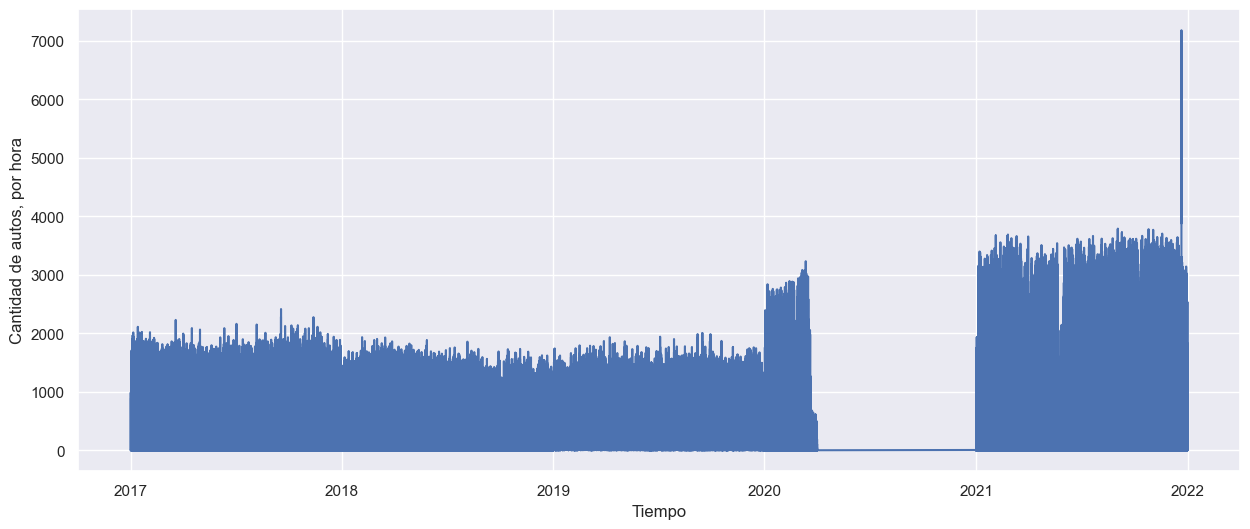

In [89]:
plt.figure(figsize = (15,6))
plt.plot(data_2017_2021.fecha, data_2017_2021.cantidad_pasos)
#plt.xlim(datetime.date(2008,2,1), datetime.date(2008,5,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [95]:
data_2017_2021

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,Pesado,Provincia,1
1,2017-01-01 00:00:00,Domingo,Liviano,Provincia,9
2,2017-01-01 00:00:00,Domingo,Liviano,Provincia,644
3,2017-01-01 00:00:00,Domingo,Pesado,Provincia,6
4,2017-01-01 00:00:00,Domingo,Pesado,Provincia,1
...,...,...,...,...,...
3029361,2021-12-21 15:00:00,Martes,N/D,Centro,2330
3029362,2021-12-21 15:00:00,Martes,N/D,Provincia,1969
3029363,2021-12-21 15:00:00,Martes,N/D,Centro,3
3029364,2021-12-21 15:00:00,Martes,N/D,Centro,2445


In [96]:
data_2017_2021.drop(columns = ['dia','sentido','tipo_vehiculo',], inplace = True)
data_2017_2021

C:\Users\matte\AppData\Local\Temp\ipykernel_2272\379317295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017_2021.drop(columns = ['dia','sentido','tipo_vehiculo',], inplace = True)


,fecha,cantidad_pasos
0,2017-01-01 00:00:00,1
1,2017-01-01 00:00:00,9
2,2017-01-01 00:00:00,644
3,2017-01-01 00:00:00,6
4,2017-01-01 00:00:00,1
...,...,...
3029361,2021-12-21 15:00:00,2330
3029362,2021-12-21 15:00:00,1969
3029363,2021-12-21 15:00:00,3
3029364,2021-12-21 15:00:00,2445


In [99]:
data_2017_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3941064 entries, 0 to 3029365
Data columns (total 2 columns):
 #   Column          Dtype         
---  ------          -----         
 0   fecha           datetime64[ns]
 1   cantidad_pasos  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 90.2+ MB


In [100]:
# Convertir la columna 'cantidad_pasos' a tipo numérico
data_2017_2021['cantidad_pasos'] = pd.to_numeric(data_2017_2021['cantidad_pasos'], errors='coerce')
# Verificar el tipo de dato después de la conversión
data_2017_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3941064 entries, 0 to 3029365
Data columns (total 2 columns):
 #   Column          Dtype         
---  ------          -----         
 0   fecha           datetime64[ns]
 1   cantidad_pasos  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 90.2 MB


C:\Users\matte\AppData\Local\Temp\ipykernel_2272\1771546253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017_2021['cantidad_pasos'] = pd.to_numeric(data_2017_2021['cantidad_pasos'], errors='coerce')


In [101]:
data_2017_2021 = data_2017_2021.resample('D', on = 'fecha').sum()#ojo que me suma todas las columnas, también las string. Eventualmente se podría ver algo con esto, por ahora no lo tenemos en cuenta 
print(data_2017_2021.shape)
data_2017_2021.head()

(1826, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


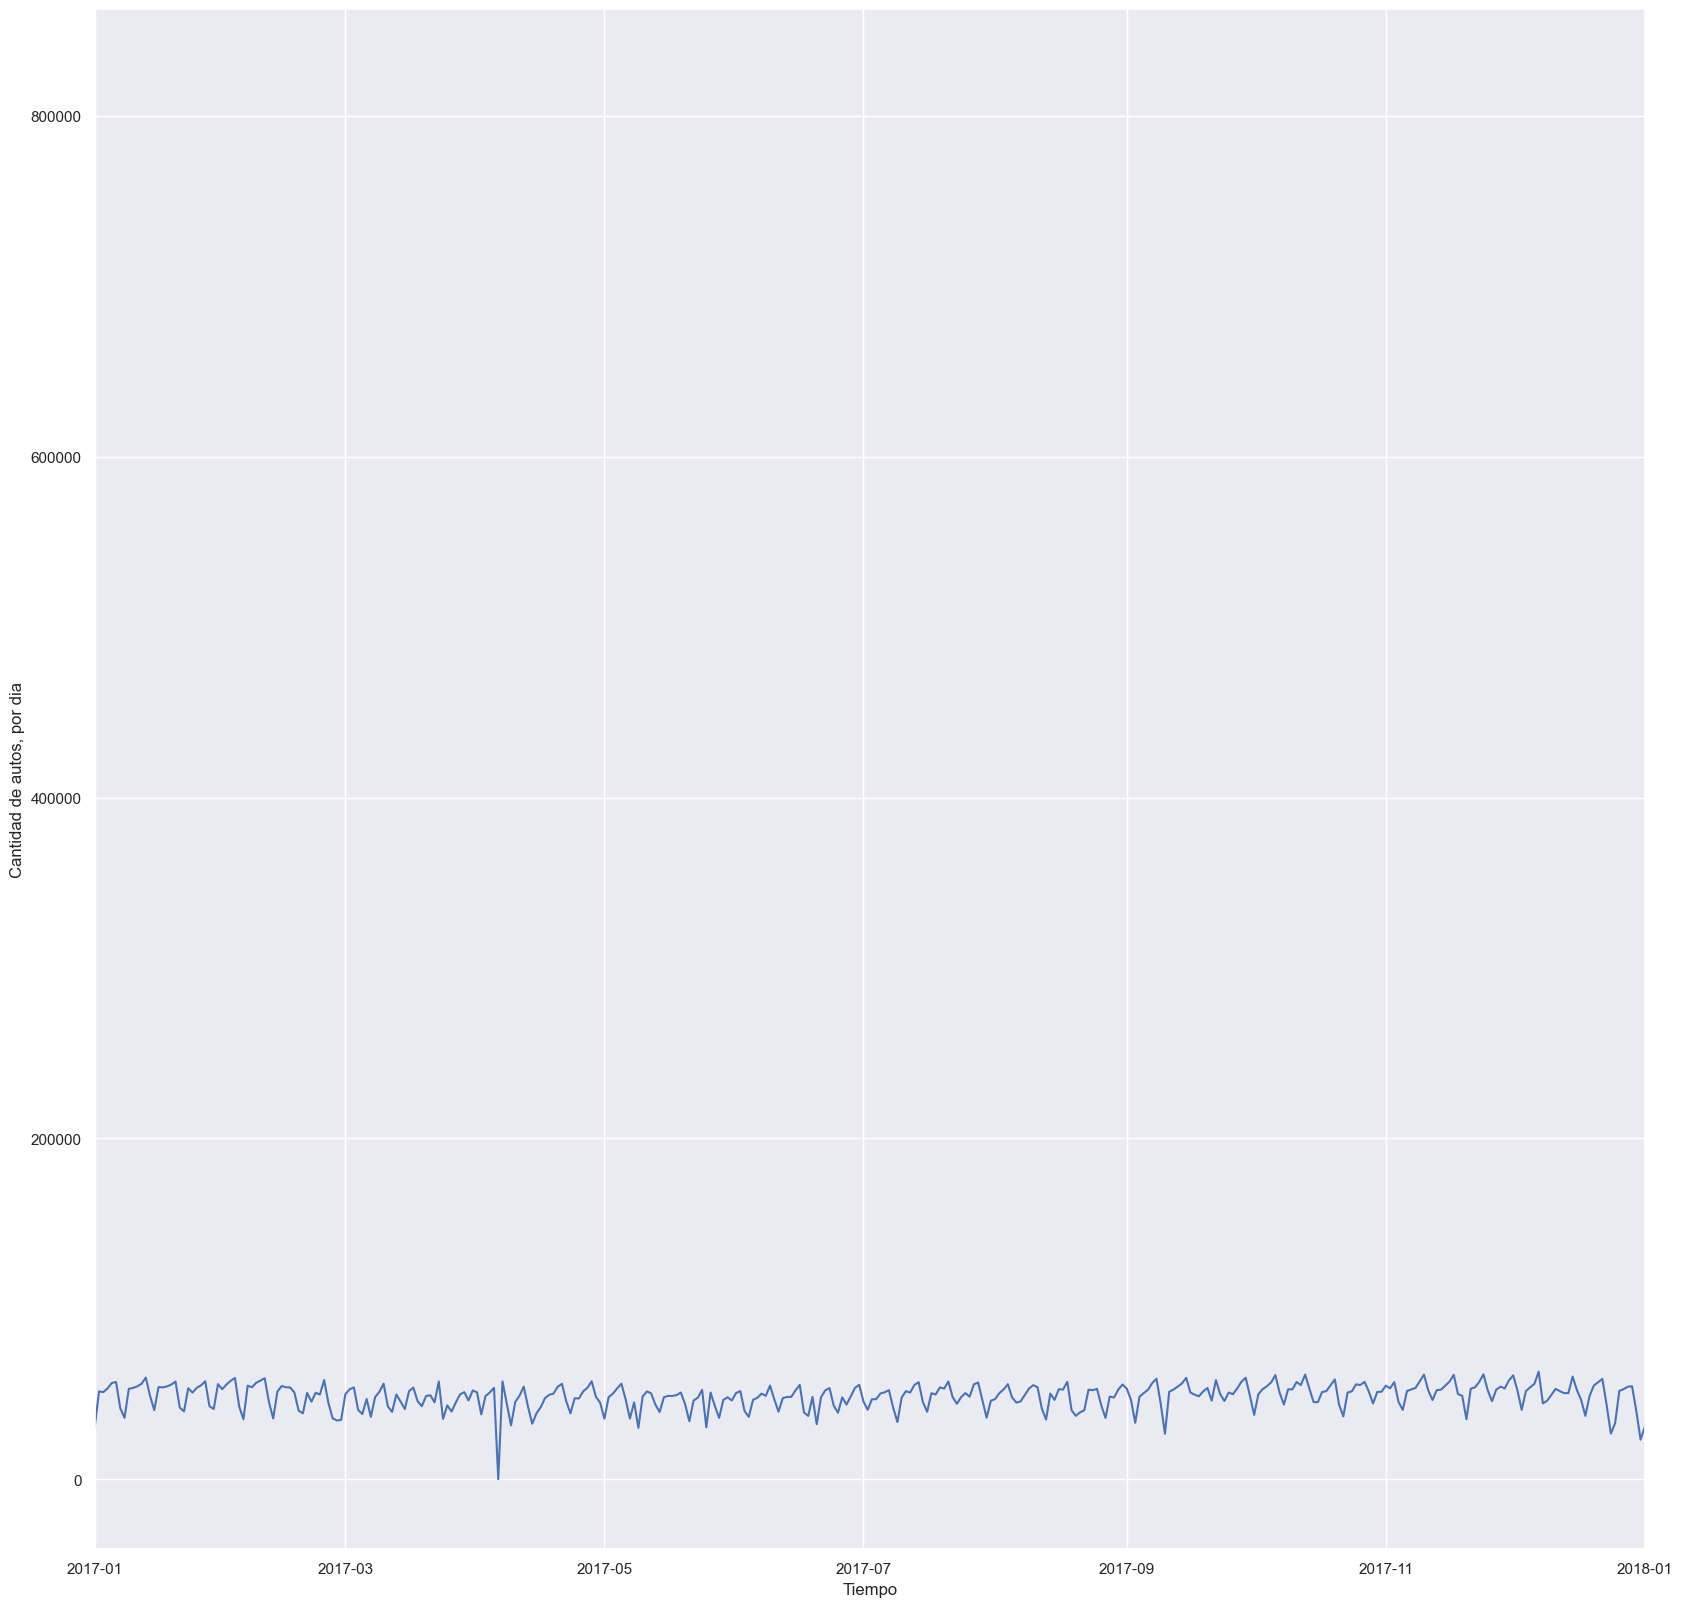

In [108]:
#Miramos por periodos de un año
plt.figure(figsize = (20,20))
plt.plot(data_2017_2021.index, data_2017_2021.cantidad_pasos)
plt.xlim(datetime.date(2017,1,1), datetime.date(2018,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

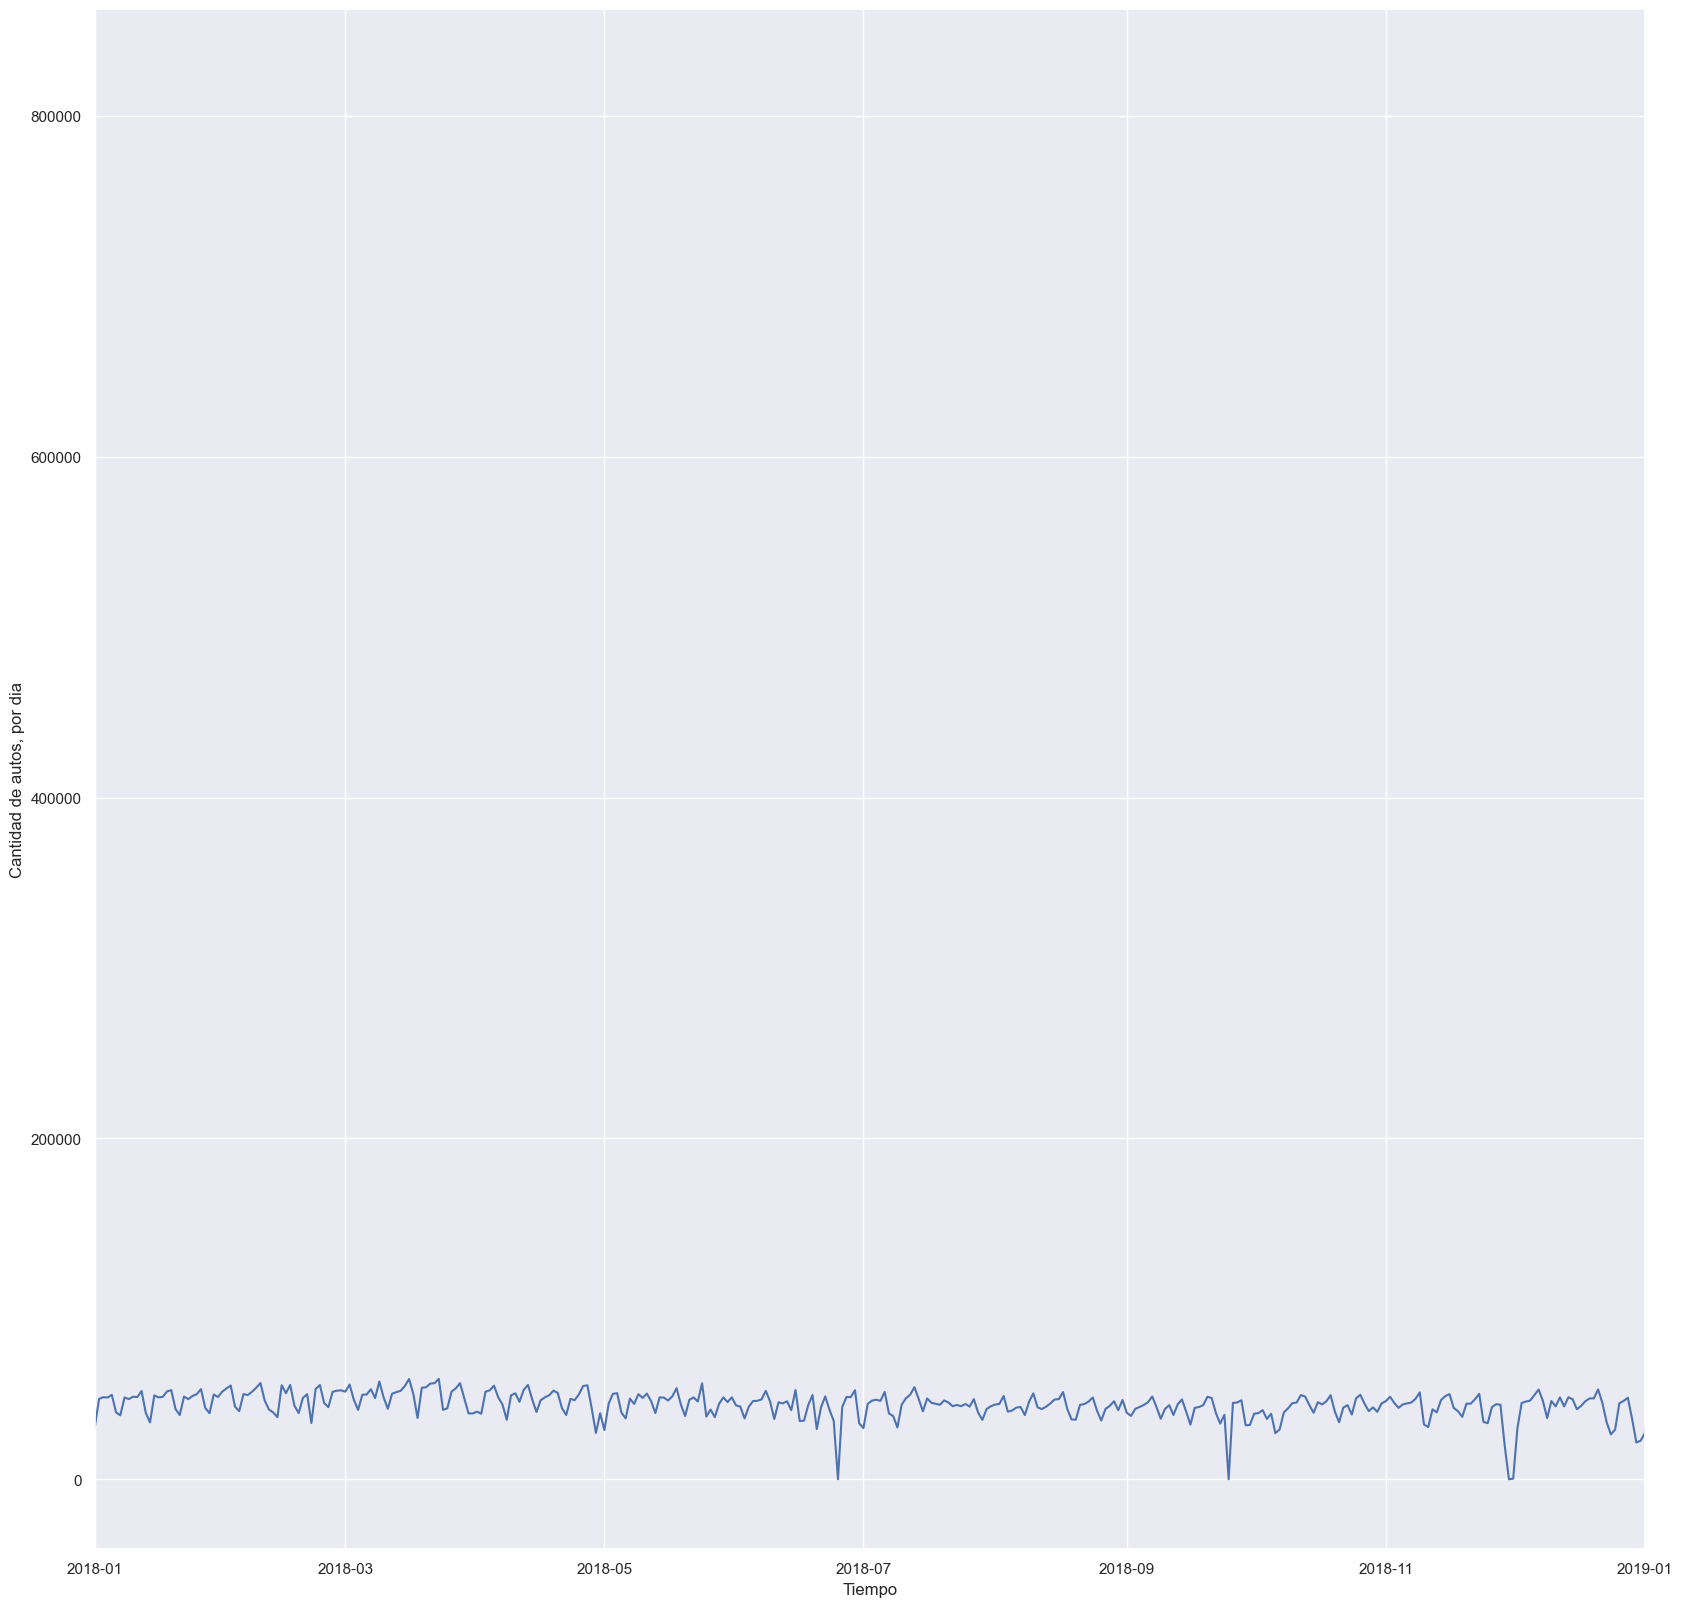

In [109]:
#Miramos por periodos de un año
plt.figure(figsize = (20,20))
plt.plot(data_2017_2021.index, data_2017_2021.cantidad_pasos)
plt.xlim(datetime.date(2018,1,1), datetime.date(2019,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

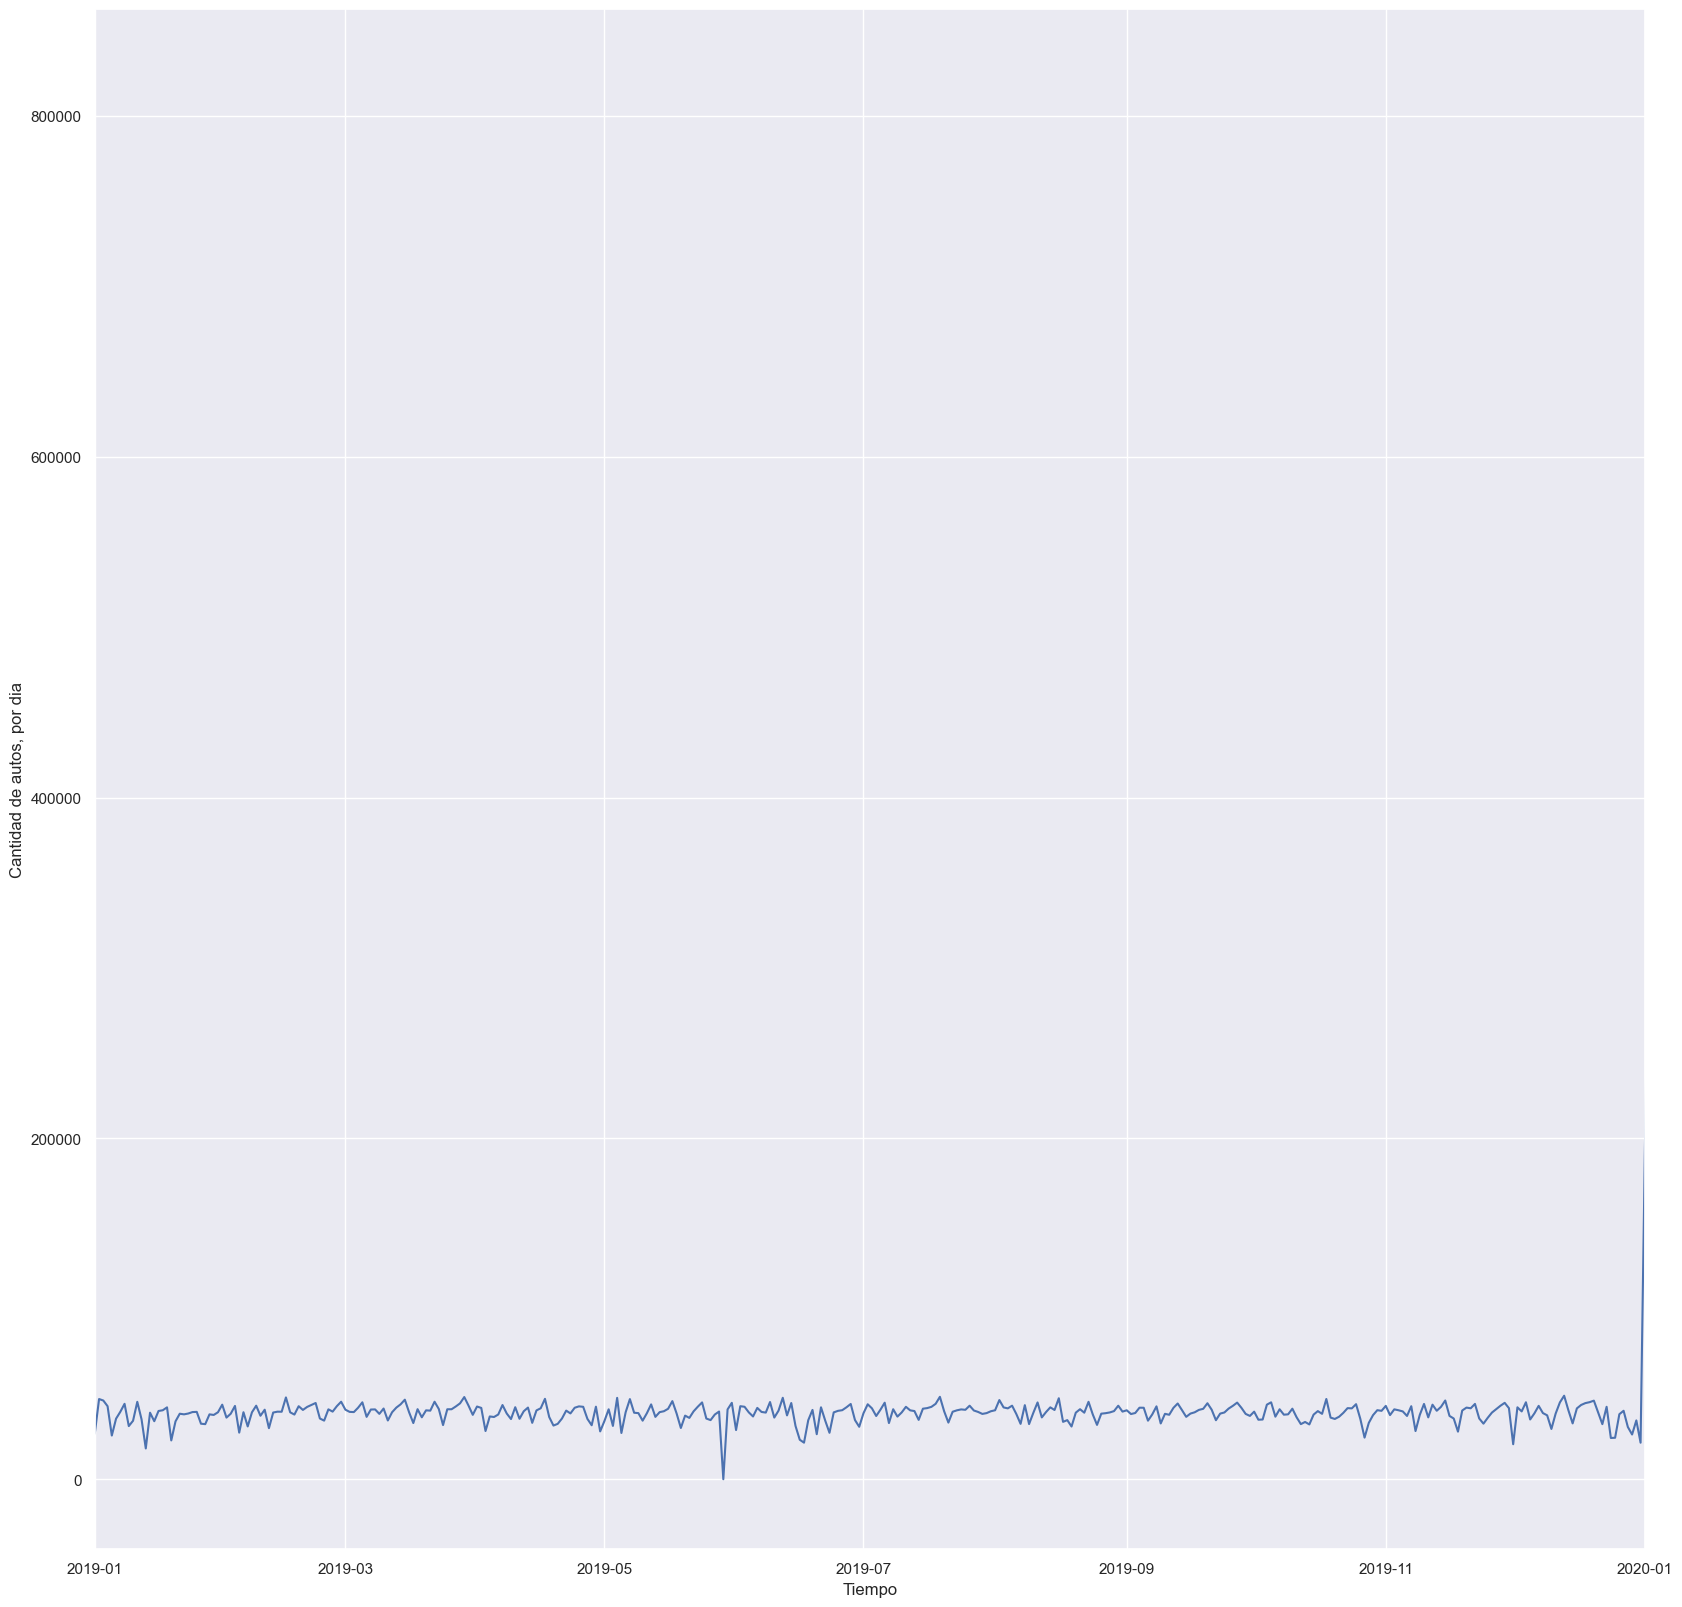

In [110]:
#Miramos por periodos de un año
plt.figure(figsize = (20,20))
plt.plot(data_2017_2021.index, data_2017_2021.cantidad_pasos)
plt.xlim(datetime.date(2019,1,1), datetime.date(2020,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

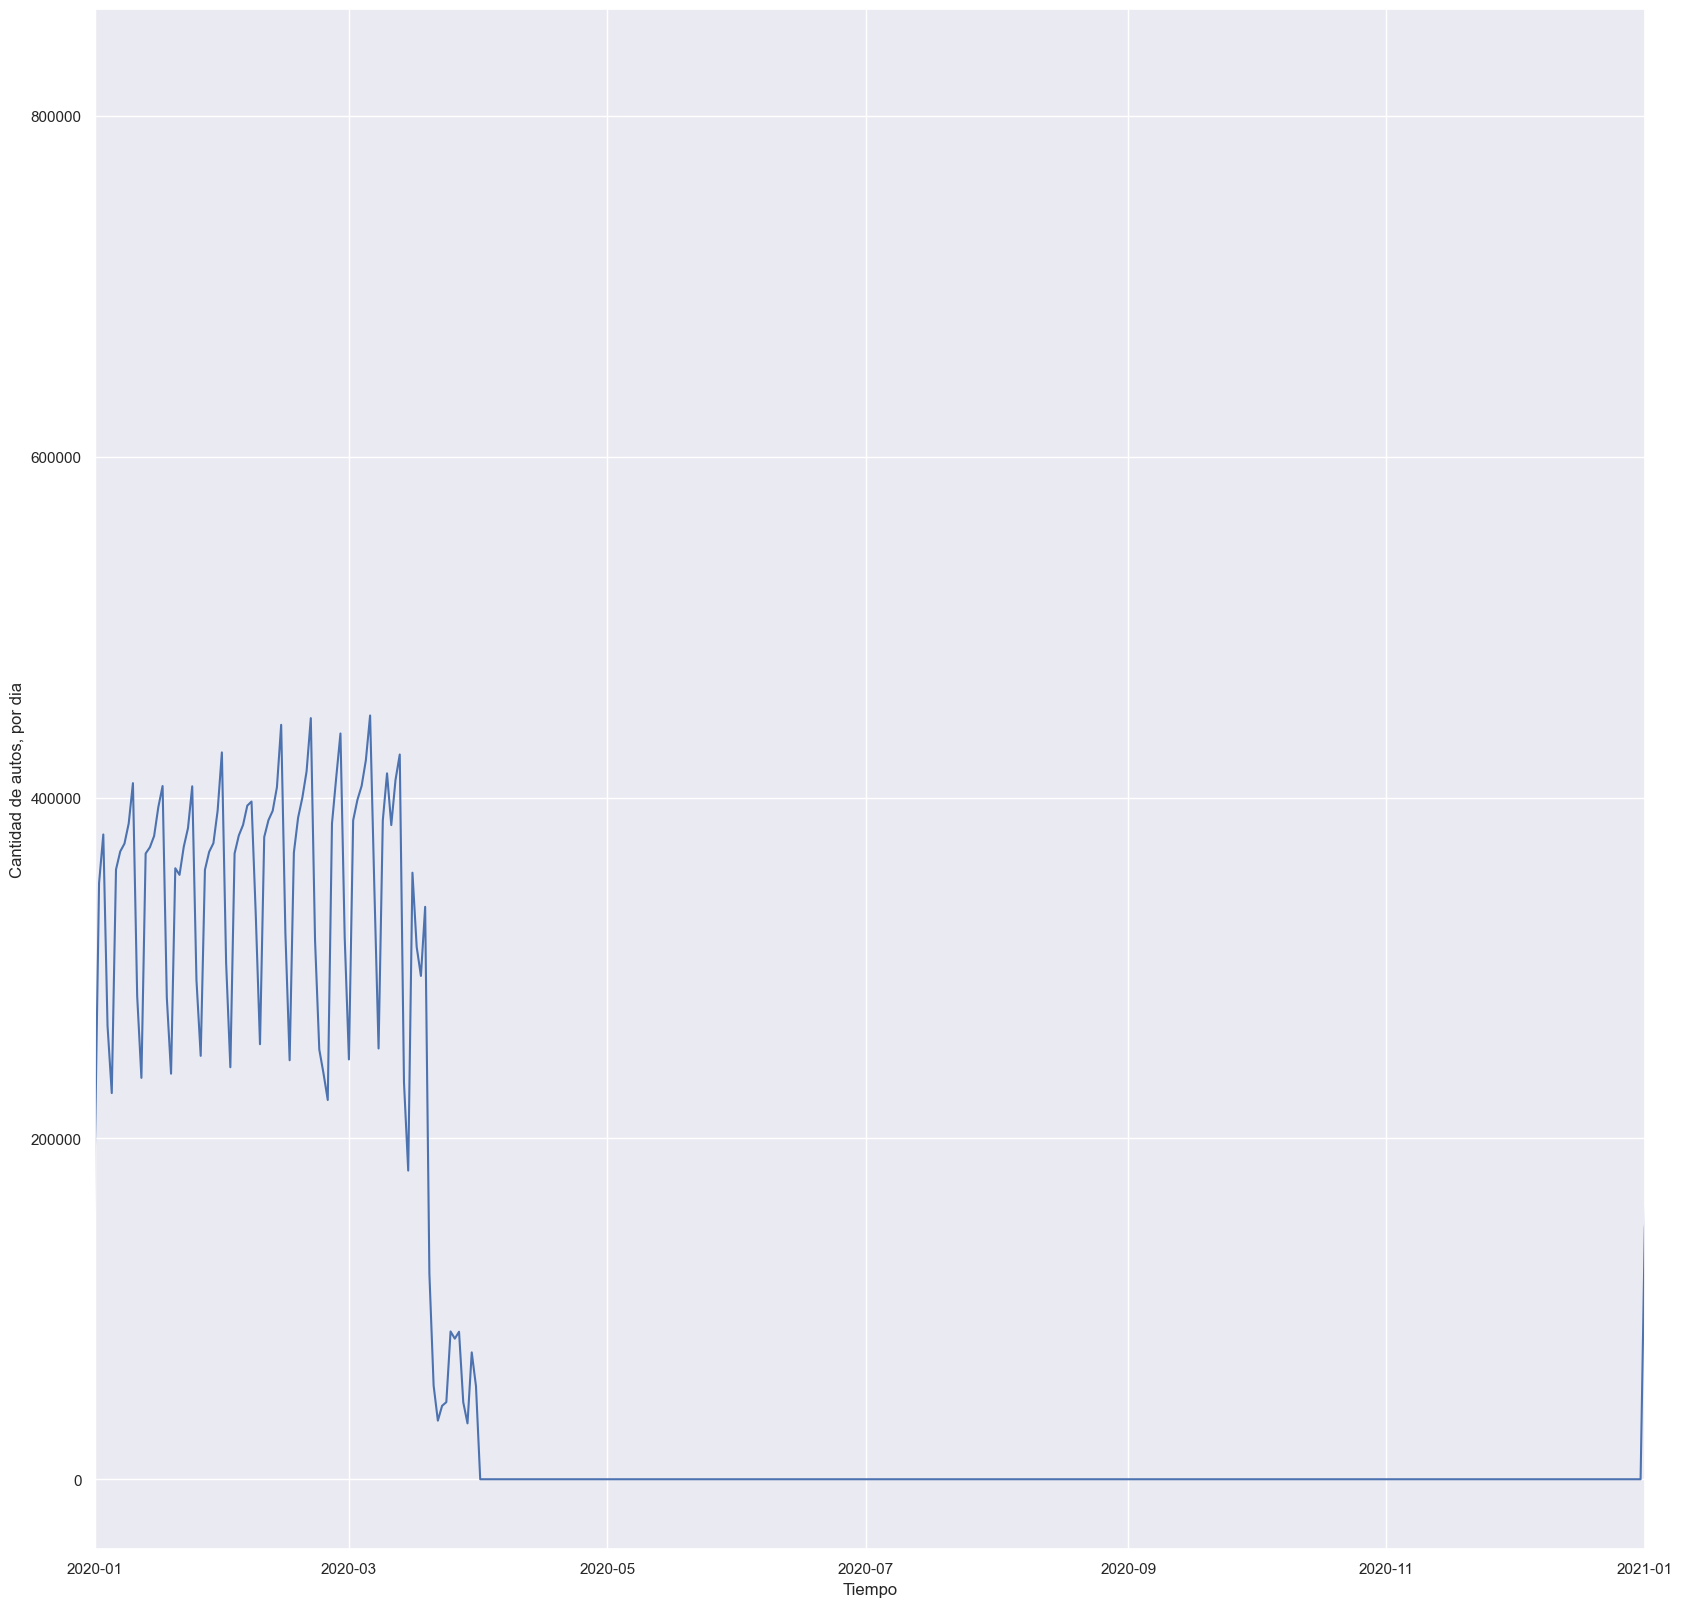

In [111]:
#Miramos por periodos de un año
plt.figure(figsize = (20,20))
plt.plot(data_2017_2021.index, data_2017_2021.cantidad_pasos)
plt.xlim(datetime.date(2020,1,1), datetime.date(2021,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [115]:
#pasamos los datos a frecuencia semanal
data_2017_2021 = data_2017_2021.reset_index()
semanal = data_2017_2021.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.tail()

(262, 1)


,cantidad_pasos
fecha,
2021-12-05,2730841
2021-12-12,2657171
2021-12-19,2859063
2021-12-26,2468454
2022-01-02,1780730


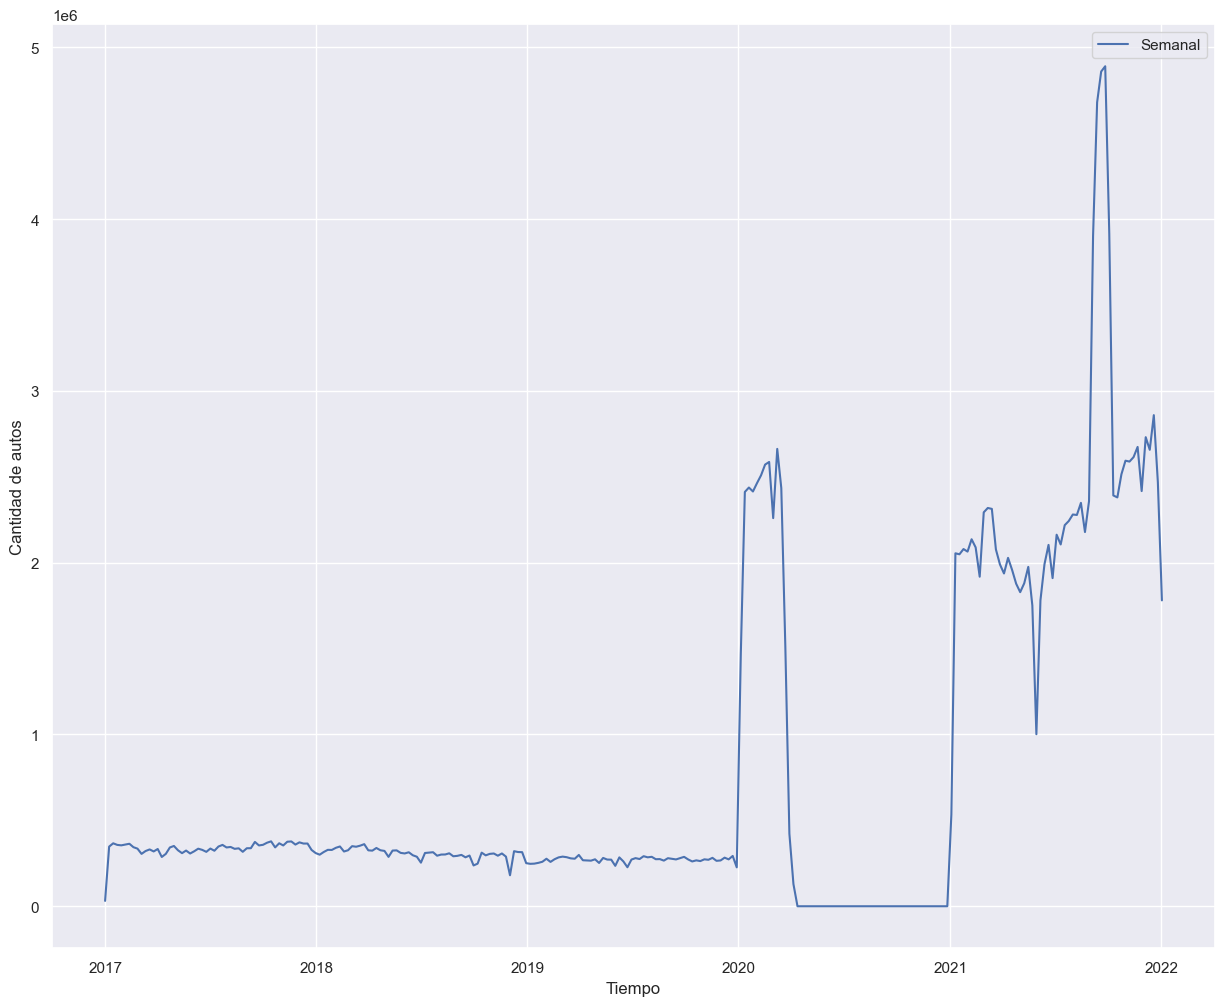

In [121]:
plt.figure(figsize = (15,12))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Semanal')
# plt.xlim(datetime.date(2018,1,1), datetime.date(2019,1,1))
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.show()

In [130]:
PROPHET = data_2017_2021.reset_index()
PROPHET.rename(columns = {'fecha':'ds', 'cantidad_pasos':'y'}, inplace = True)
PROPHET

,index,ds,y
0,0,2017-01-01,31183
1,1,2017-01-02,51568
2,2,2017-01-03,51093
3,3,2017-01-04,53332
4,4,2017-01-05,56486
...,...,...,...
1821,1821,2021-12-27,368706
1822,1822,2021-12-28,388601
1823,1823,2021-12-29,397415
1824,1824,2021-12-30,392465


In [131]:
PROPHET.drop(columns=['index'], inplace=True)
PROPHET

,ds,y
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
1821,2021-12-27,368706
1822,2021-12-28,388601
1823,2021-12-29,397415
1824,2021-12-30,392465


In [133]:
m = Prophet()
m.fit(PROPHET)

01:15:32 - cmdstanpy - INFO - Chain [1] start processing
01:15:33 - cmdstanpy - INFO - Chain [1] done processing


In [134]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2186,2022-12-27
2187,2022-12-28
2188,2022-12-29
2189,2022-12-30
2190,2022-12-31


C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


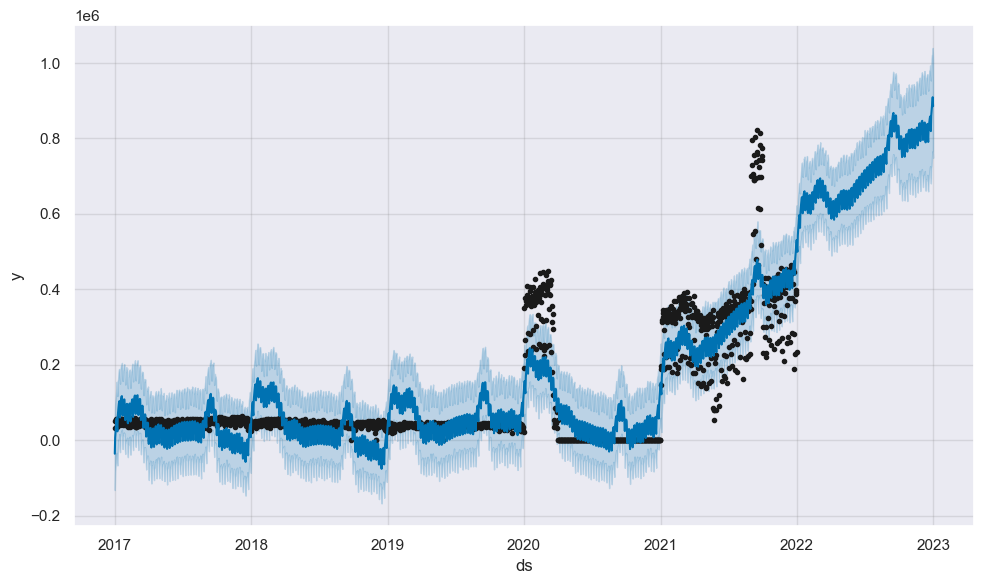

In [135]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\matte\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

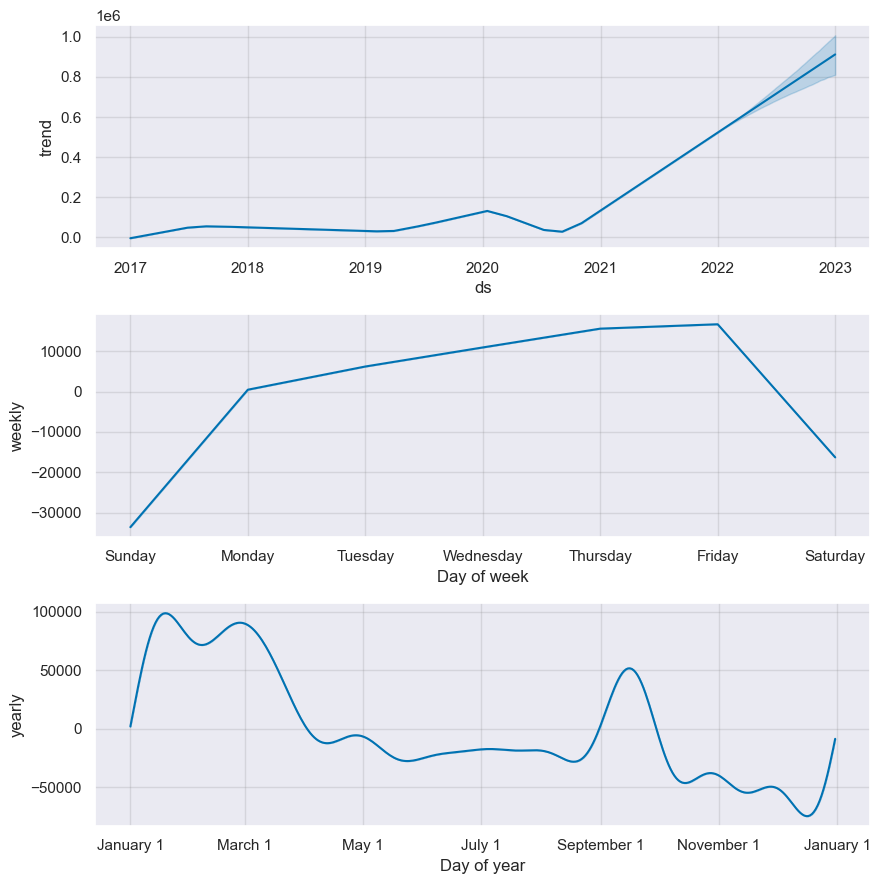

In [136]:
fig2 = m.plot_components(forecast)